# Am I going to get a sponsored visa when I move to Australia? 
#            How much cash $$ am I going to make?


#### Well, as always, it depends. An today we are going to see on what it depends.

To know what is the perfect eceonomic activity to apply for a job, I wanted to know how many visas were sponsored for each sector and also how much money do they make. So I have a picture of the situation that I will be facing. I will go through all the steps I followed and the conclusions I achieved.

### *Step 1 - Find the perfect website. *
And I found it. The Australian Bureau of Statistics. It contains all the information I need, but the way to get may be different. But it is not a problem for us Ironhackers!
 
### *Step 2 - Download the data. *
On one hand, I just downloaded an excel file from the site that contained the median of income for year and activity. On the other hand, I requested an excel file through an API to the same site, to get the number of visas sponsored for each year and activity. It was confusing at the beginning, but they have specific documentation as a guide to perform an API request. Introducing the required arguments and parameters I managed to extract the data I wanted.
 
### *Step 3 - Clean the excel files. *
Both had titles and blank rows, a weird format basically. I wanted both to have a similar format, so I can merge them once I have finished the cleaning part. So, I got rid of blanks, and I stack the data frames to have the information in the way I wanted to.
 
### *Step 4 - Merge. *
Left join on the table containing the visa's information, since I have more years of data, I wanted to keep as much as possible. To do so, I already prepared the tables in my cleaning part, so my data frames have the same column names for the year and the economic activity, as well as the same format for the values in them. This way I managed to merge both table using two columns, and I have accurate data for year and activity. 
 
### *Step 5 - Visualization*
This is the part that gives us the fancy graphs and the conclusions as well. I created different plots to visualise the information I got in a way that was useful and meaningful, we will go through all of them, analysing and extracting conclusions

_________________________________________________________________________________

Knowing already the steps I went through, these are the results I managed to get. And how I did it.

In [65]:
# I import all the libraries in the same place.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [66]:
# I import the excel file that I prepared in previous steps, all the code is within other files.

all_together = pd.read_excel('../data/all_together.xlsx')
all_together.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       310 non-null    int64  
 1   Year             310 non-null    int64  
 2   Activity         310 non-null    object 
 3   Sponsored_visas  300 non-null    float64
 4   Median_income    95 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 12.2+ KB


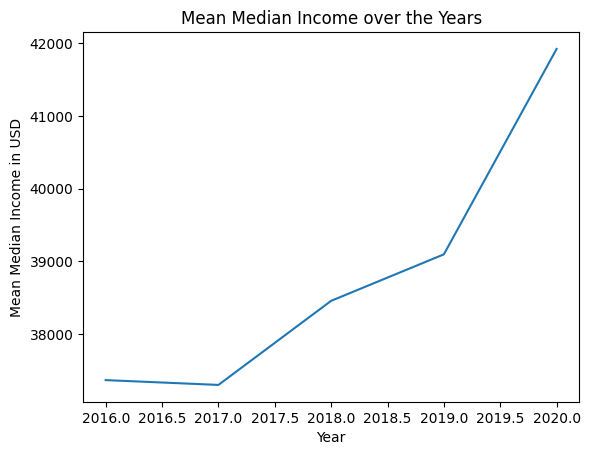

In [67]:


# Group the data by year and calculate the mean median income
mean_median_income_by_year = all_together.groupby('Year')['Median_income'].mean().reset_index()

# Plot the mean median income over the years
plt.plot(mean_median_income_by_year['Year'], mean_median_income_by_year['Median_income'])

# Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Mean Median Income in USD')
plt.title('Mean Median Income over the Years')

# Show the plot
plt.show()

We can see that over the years, the mean of income has been increasing, independently of the activity, which is good news!


Let’s check which economic activity has the higher income!

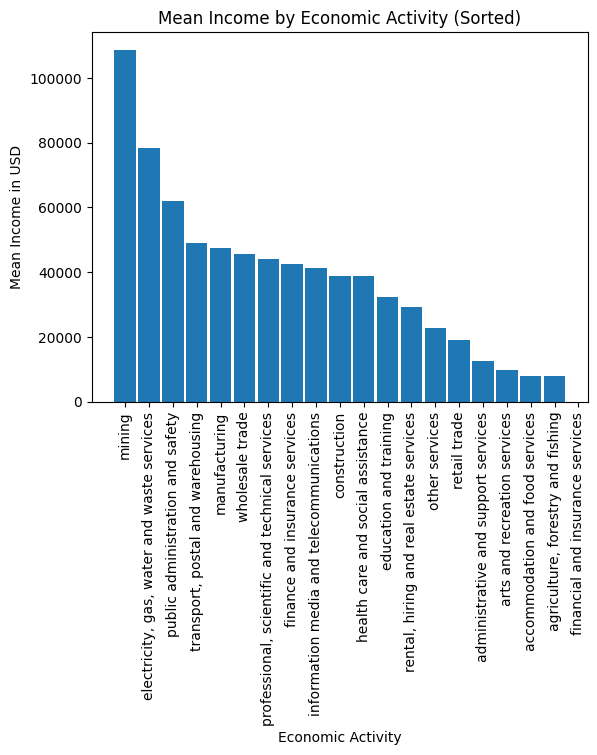

In [68]:
# Group the data by activity and calculate the mean number of sponsored visas
mean_sponsored_visas_by_activity = all_together.groupby('Activity')['Median_income'].mean().reset_index()

# Sort the data in descending order based on the mean number of sponsored visas
mean_sponsored_visas_by_activity = mean_sponsored_visas_by_activity.sort_values(by='Median_income', ascending=False)

# Plot the mean number of sponsored visas for each activity as a bar plot
plt.bar(mean_sponsored_visas_by_activity['Activity'], mean_sponsored_visas_by_activity['Median_income'],width=0.9)

# Add labels and title to the plot
plt.xlabel('Economic Activity')
plt.ylabel('Mean Income in USD')
plt.title('Mean Income by Economic Activity (Sorted)')


# Rotate the x-axis labels to improve readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

The economic activities that have higher incomes are mining, natural resources, and public administration. Those are difficult to enter since you need to pass a lot of requirements. No good news for me in this matter. 

Now we will check the number of sponsored visas for year and activity.

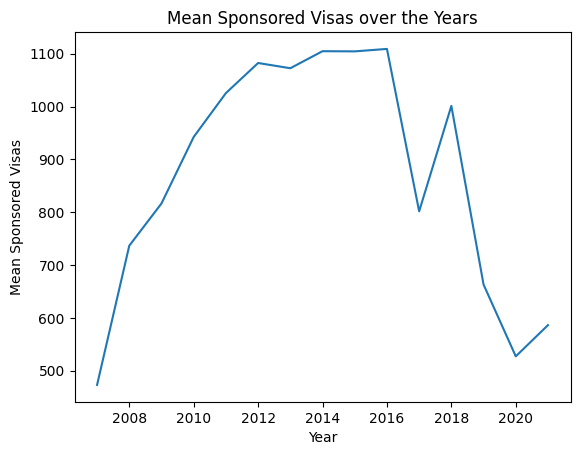

In [69]:

# Group the data by year and calculate the mean number of sponsored visas
mean_sponsored_visas_by_year = all_together.groupby('Year')['Sponsored_visas'].mean().reset_index()

# Plot the mean number of sponsored visas over the years
plt.plot(mean_sponsored_visas_by_year['Year'], mean_sponsored_visas_by_year['Sponsored_visas'])

# Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Mean Sponsored Visas')
plt.title('Mean Sponsored Visas over the Years')

# Show the plot
plt.show()


We can see how the number of sponsored visas was increasing from 2008 to 2016. That year, the AUS government decided to apply strictier policies to the process, that's why we see a huge drop that year. Later on, we can see that was increasing againg, even with the hard measures, and after that, it fell again due to fires around the country and Covid. Overall we can exctract, that the last 3-4 years, AUS didn't grant as many visas as before. It means that it is a good opportunity to request one, because as per natural growth, these numbers will increase and now they are quite low.

Let's see the which is the economic activity that grants more sponsored visas.

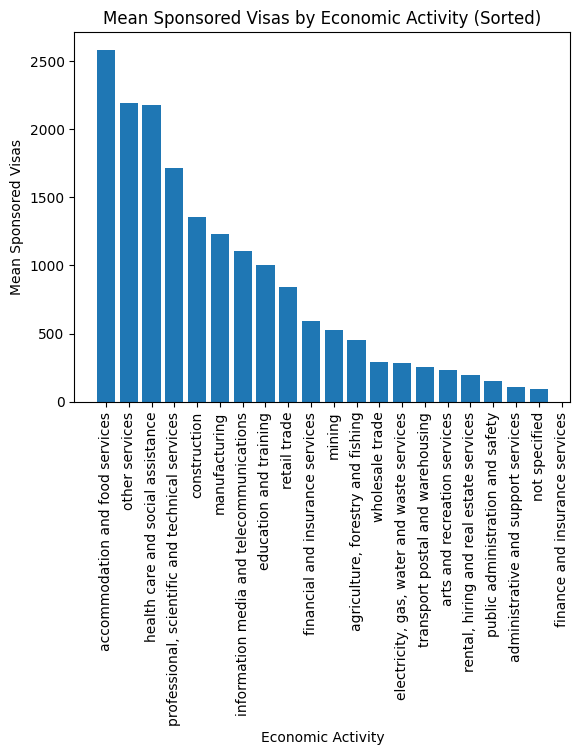

In [70]:


# Group the data by activity and calculate the mean number of sponsored visas
mean_sponsored_visas_by_activity = all_together.groupby('Activity')['Sponsored_visas'].mean().reset_index()

# Sort the data in descending order based on the mean number of sponsored visas
mean_sponsored_visas_by_activity = mean_sponsored_visas_by_activity.sort_values(by='Sponsored_visas', ascending=False)

# Plot the mean number of sponsored visas for each activity as a bar plot
plt.bar(mean_sponsored_visas_by_activity['Activity'], mean_sponsored_visas_by_activity['Sponsored_visas'],)


# Add labels and title to the plot
plt.xlabel('Economic Activity')
plt.ylabel('Mean Sponsored Visas')
plt.title('Mean Sponsored Visas by Economic Activity (Sorted)')

# Rotate the x-axis labels to improve readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


Apparently, it's not only easier to get temporary jobs in accomodation and food services, but also it's easier to get a sponsored visa! But easier means better? It looks like is one of the lowest incomes...

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


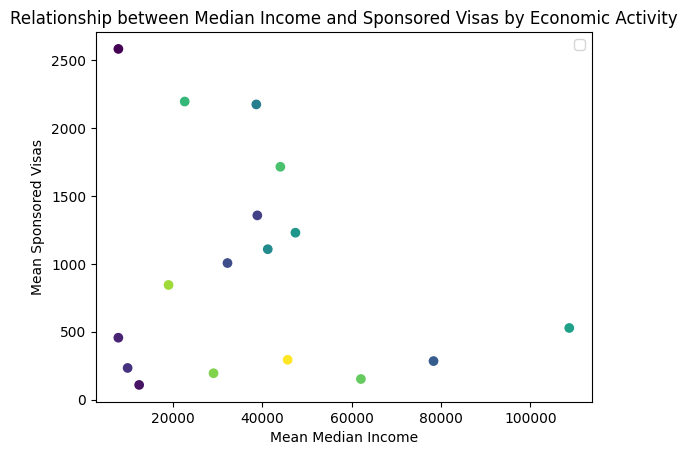

In [71]:



mean_median_income_and_sponsored_visas_by_activity = all_together.groupby('Activity').agg({'Median_income': 'mean', 'Sponsored_visas': 'mean'}).reset_index()

# Create a color map
cmap = plt.get_cmap('viridis')

# Plot the relationship between median income and number of sponsored visas as a scatter plot
plt.scatter(mean_median_income_and_sponsored_visas_by_activity['Median_income'], mean_median_income_and_sponsored_visas_by_activity['Sponsored_visas'], 
            c=mean_median_income_and_sponsored_visas_by_activity.index, cmap=cmap)

# Add labels and title to the plot
plt.xlabel('Mean Median Income')
plt.ylabel('Mean Sponsored Visas')
plt.title('Relationship between Median Income and Sponsored Visas by Economic Activity')
legend=list[mean_median_income_and_sponsored_visas_by_activity['Activity']]
# Add a legend
plt.legend()

# Show the plot
plt.show()


We can see that there is pattern, at least for the highest income activities. They don't grant many sponsored visas. And for those that grant them, the income is low...

Now we can see the distribution of incomes in a boxplot. 

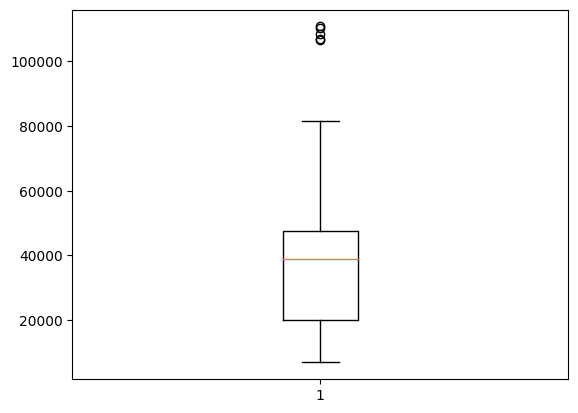

In [72]:
boxplot_df = all_together.dropna(subset=['Median_income'])
plt.boxplot(boxplot_df['Median_income'])
plt.show()

The range of incomes is really wide, from less than 10k up to 85k. And 50% of the people ar earning less than 40k, being the range between 20k and 40k the most common salary. That is not what I was expecting. The data didn't provide the working hours, that would be really useful too. 

Lastly, I wanted to try a fancy colorful plot, to see easly what is the activity with higher income and its the tendency.

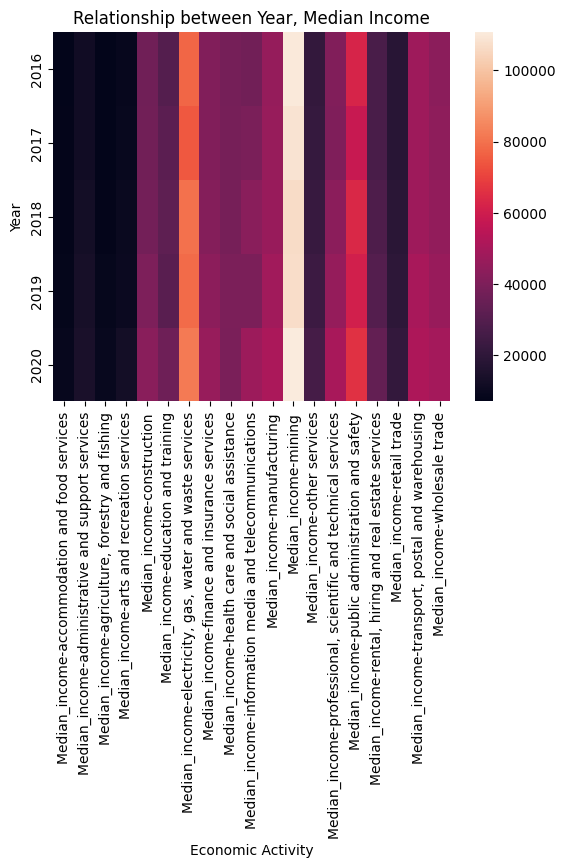

In [73]:


# Create a pivot table with year, median income, and number of sponsored visas as columns
pivot_table = all_together.pivot_table(index='Year', columns='Activity', values=['Median_income'])

# Plot the pivot table as a heatmap
sns.heatmap(pivot_table)

# Add labels and title to the plot
plt.xlabel('Economic Activity')
plt.ylabel('Year')
plt.title('Relationship between Year, Median Income')

# Show the plot
plt.show()


### We can conclude that is not easy to get a sponsored visa, and if you get any, is not going to be a high salary. But we will try it anyways!

PD: - All the code notebooks for each step are in the folder called "notebooks". 
    - All the python files that can be used are in the folder called "python_files".